In [15]:
# 1.Create a DataFrame named df with 6 nrows with the following columns:
import pandas as pd
import numpy as np

np.random.seed(0)

#random floating point value
col1 = np.random.rand(6)

col2 = np.random.choice(["test","train"], size = 6)

col3 = np.random.randint(1, 100, size=6)

col4 = pd.Series(np.random.randint(1, 100, size=6))

col5 = pd.date_range(start="2021-01-01", periods=6, freq='MS')

# Create the DataFrame
df = pd.DataFrame({'A':col1,'B':col2,'C':col3,'D':col4,'E':col5})

# Display the DataFrame
print(df)

          A      B   C   D          E
0  0.548814   test  59  82 2021-01-01
1  0.715189  train  66  38 2021-02-01
2  0.602763   test  40  26 2021-03-01
3  0.544883   test  88  78 2021-04-01
4  0.423655   test  47  73 2021-05-01
5  0.645894   test  89  10 2021-06-01


In [16]:
# 2.Convert numeric columns into a numpy.matrix and compute the row sums.
df_numeric_only = df.select_dtypes(include = ['int64','int32','float32','float64'])
matrix_numeric_only = np.matrix(df_numeric_only)
matrix_numeric_only.sum(axis = 1) # this will not exclude any NaN

matrix([[141.5488135 ],
        [104.71518937],
        [ 66.60276338],
        [166.54488318],
        [120.4236548 ],
        [ 99.64589411]])

In [17]:
# 3.Sort df by column C
df.sort_values(by = ['C'])

,A,B,C,D,E
2,0.602763,test,40,26,2021-03-01
4,0.423655,test,47,73,2021-05-01
0,0.548814,test,59,82,2021-01-01
1,0.715189,train,66,38,2021-02-01
3,0.544883,test,88,78,2021-04-01
5,0.645894,test,89,10,2021-06-01


In [18]:
# 4.Filter df for entries for which B has value train and C has values greater than 0.
df[(df.B == 'train')&(df.C > 0)]
df.query('B == "train" and C > 0')

,A,B,C,D,E
1,0.715189,train,66,38,2021-02-01


In [19]:

# 5.Change the value in the 4th column and 2nd row to 10
df.iat[1,3] = 10
df

,A,B,C,D,E
0,0.548814,test,59,82,2021-01-01
1,0.715189,train,66,10,2021-02-01
2,0.602763,test,40,26,2021-03-01
3,0.544883,test,88,78,2021-04-01
4,0.423655,test,47,73,2021-05-01
5,0.645894,test,89,10,2021-06-01


In [20]:
# 6.Create a column F where half the values are NaN
colF = np.random.rand(6)
for index,val in enumerate(colF):
    if index > 2:
        colF[index] = np.nan
colF

df.insert(5, 'F', colF)

In [21]:
df

,A,B,C,D,E,F
0,0.548814,test,59,82,2021-01-01,0.648172
1,0.715189,train,66,10,2021-02-01,0.368242
2,0.602763,test,40,26,2021-03-01,0.957155
3,0.544883,test,88,78,2021-04-01,NaN
4,0.423655,test,47,73,2021-05-01,NaN
5,0.645894,test,89,10,2021-06-01,NaN


In [22]:
# 7. Deal with missing values in two different ways:
# 7a. remove entries with missing data
df.dropna()

,A,B,C,D,E,F
0,0.548814,test,59,82,2021-01-01,0.648172
1,0.715189,train,66,10,2021-02-01,0.368242
2,0.602763,test,40,26,2021-03-01,0.957155


In [23]:
# 7. Deal with missing values in two different ways:
# 7b. fill missing values with 0
df.replace(to_replace = np.nan, value = 0)

,A,B,C,D,E,F
0,0.548814,test,59,82,2021-01-01,0.648172
1,0.715189,train,66,10,2021-02-01,0.368242
2,0.602763,test,40,26,2021-03-01,0.957155
3,0.544883,test,88,78,2021-04-01,0.000000
4,0.423655,test,47,73,2021-05-01,0.000000
5,0.645894,test,89,10,2021-06-01,0.000000


In [25]:
# 8. Convert column A into a cumulative sum.
df['A'] = df['A'].cumsum()


In [26]:
# 9. Subtract column A from column B - 2 diff data types
df['A'].sub(df['C'])

0   -58.451186
1   -64.735997
2   -38.133234
3   -85.588351
4   -44.164696
5   -85.518802
dtype: float64

Text(0, 0.5, 'Value')

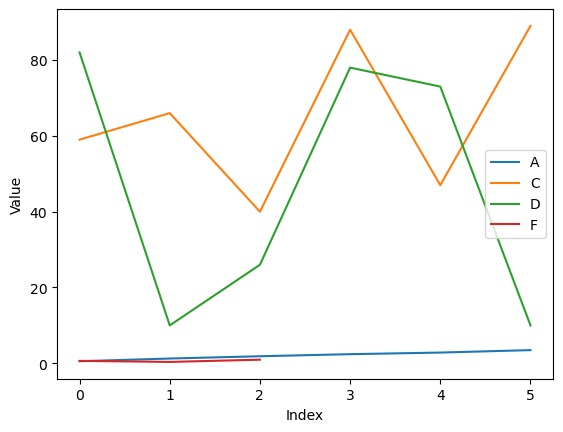

In [27]:
# 10. Plot the numeric columns as a line plot, ensuring that the plot has proper labels.
import matplotlib.pyplot as plt
df_numeric_only = df.select_dtypes(include = ['int64','int32','float32','float64'])
df_numeric_only.plot()
plt.xlabel('Index')
plt.ylabel('Value')

In [28]:
#11. Compute the mean values of each column for groups train and test
df.groupby('B').mean()

,A,C,D,E,F
B,,,,,
test,2.228746,64.6,53.8,2021-03-26,0.802664
train,1.264003,66.0,10.0,2021-02-01,0.368242


In [25]:
df1 = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)

dic = {'a':[],'b':[]}

for i in df1.index:
    if df1['group'][i] == 'a':
        value_list = dic['a']
        value_list.append(df1['value'][i])
        dic.update({'a':value_list})
    else:
        value_list = dic['b']
        value_list.append(df1['value'][i])
        dic.update({'b':value_list})

df2 = pd.DataFrame(dic)
df2
        

,a,b
0,1,4
1,2,5
2,3,6


In [29]:
#12.a Convert the following DataFrame from a into b (long to wide). Using manual way.

df1 = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)

x = df1.groupby('group')['value'].apply(list).to_dict()
x

{'a': [1, 2, 3], 'b': [4, 5, 6]}

In [30]:
#12.a Convert the following DataFrame from a into b (long to wide). Using pivot function
df1 = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)

df2 = df1.pivot( columns = 'group', values = 'value')
df2

group,a,b
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,NaN,4.0
4,NaN,5.0
5,NaN,6.0


In [32]:
#12.b Additionally, convert from b into a (wide to long). Using Manual way

df2 = pd.DataFrame(
    {"a": [1, 2, 3], "b": [4, 5, 6]}
)
dic = {"value": [], "group": []}
for i in df2.index:
    group_list = dic['group']
    group_list.append('a')
    dic.update({'group':group_list})

    value_list = dic['value']
    value_list.append(df2['a'][i])    
    dic.update({'value':value_list})

for i in df2.index:
    group_list = dic['group']
    group_list.append('b')
    dic.update({'group':group_list})

    value_list = dic['value']
    value_list.append(df2['b'][i])
    
    dic.update({'value':value_list})

df = pd.DataFrame(dic)
df

,value,group
0,1,a
1,2,a
2,3,a
3,4,b
4,5,b
5,6,b


In [33]:
#12.b  Additionally, convert from b into a (wide to long). Using 'melt' function
a_converted = df2.melt(var_name='group', value_name='value')
a_converted.dropna()
print(a_converted)

  group  value
0     a      1
1     a      2
2     a      3
3     b      4
4     b      5
5     b      6


In [34]:
## Supervised Learning
# 1. Load the iris dataset 

import sklearn as sk
import sklearn.datasets
iris = sk.datasets.load_iris()

# numSamples, numFeatures = iris.data.shape
# print(numSamples)
# print(numFeatures)
# print(list(iris.target_names))


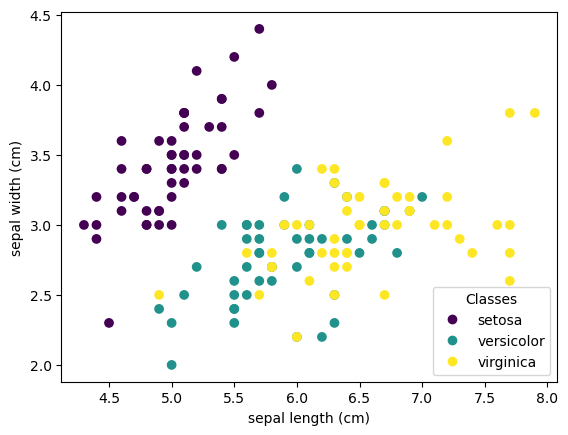

In [35]:
# 2.Visualize the data matrix.
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


In [36]:
#3. Train a random forest classifier to predict the target values and report its performance using an appropriate evaluation metric.

# Divide our data into 20% reserved for testing our model, and the remaining 80% to train it with.
# We refer to our features (in this case, the petal sizes) as X, and the labels (in this case, the species) as y

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state= 0)



In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)


In [38]:
print(predictions)
print(Y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

1.0

In [40]:
## Text mining
# 1. Using Biopython, collect medline abstracts on "medulloblastoma" published in 2012.

from Bio import Entrez
import pandas as pd
import csv

# Set email for Entrez
Entrez.email = "your_email@example.com"  # Replace with your email

# Search for medulloblastoma articles published in 2012
search_term = "medulloblastoma[Title/Abstract] AND 2012[PDAT]"
handle = Entrez.esearch(db="pubmed", term=search_term, retmax=1000)
record = Entrez.read(handle)
handle.close()

# Get the list of PubMed IDs
id_list = record["IdList"]
#Fetch the abstracts
handle = Entrez.efetch(db="pubmed", id=id_list, retmode="xml")
records = Entrez.read(handle)
handle.close()

# Save to CSV
with open('Medullablastoma.csv', mode = 'w', newline = '', encoding = 'utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['PMID', 'Title', 'Abstract','Authors'])

    for article in records['PubmedArticle']:
        pmid = article['MedlineCitation']['PMID']
        title = article['MedlineCitation']['Article']['ArticleTitle']
        abstract = ''

        if 'Abstract' in article['MedlineCitation']['Article']:
            abstract = ' '.join([a for a in article['MedlineCitation']['Article']['Abstract']['AbstractText']])

        authors = article['MedlineCitation']['Article'].get('AuthorList',[])
        author_last_names = [f"{author['LastName']}" for author in authors if 'LastName' in author]
        authors_last_name_string = ';'.join(author_last_names)        
        writer.writerow([pmid, title, abstract, authors_last_name_string])

print("Data saved to Medullablastoma.csv")

Data saved to Medullablastoma.csv


In [41]:
#2.Import the CSV table and build a SQLite database.

import sqlite3
import csv

# Create/connect to the SQLite database and add CSV data to a table
conn = sqlite3.connect('medulloblastoma.db')
cursor = conn.cursor()

cursor.execute('''
DROP TABLE IF EXISTS publications
''')
# Create a table
cursor.execute('''
CREATE TABLE publications (
    pmid TEXT PRIMARY KEY,
    title TEXT,
    abstract TEXT,
    authors TEXT
)
''')

# Read the CSV and insert data into the database
with open('Medullablastoma.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        cursor.execute('INSERT OR IGNORE INTO publications (pmid, title, abstract, authors) VALUES (?, ?, ?, ?)', row)

# Commit changes and close the connection
conn.commit()
conn.close()

In [42]:
# 3. Obtain the PMID and title of publications for authors with the surname "Shih" from the database.
conn = sqlite3.connect('medulloblastoma.db')
cursor = conn.cursor()

cursor.execute('''
SELECT pmid, title FROM publications
WHERE authors LIKE '%;shih;%' OR authors LIKE 'shih;%' OR authors LIKE '%;shih'
''') 
output = cursor.fetchall() 
for row in output: 
  print(row) 
    
# Close the connection 
conn.close()

('23184418', 'Aberrant patterns of H3K4 and H3K27 histone lysine methylation occur across subgroups in medulloblastoma.')
('22832583', 'Dissecting the genomic complexity underlying medulloblastoma.')
('22832581', 'Subgroup-specific structural variation across 1,000 medulloblastoma genomes.')
('22358458', 'Subgroup-specific alternative splicing in medulloblastoma.')
('22343890', 'Clonal selection drives genetic divergence of metastatic medulloblastoma.')
('22265402', 'Genome sequencing of pediatric medulloblastoma links catastrophic DNA rearrangements with TP53 mutations.')
('22057785', 'Rapid, reliable, and reproducible molecular sub-grouping of clinical medulloblastoma samples.')
